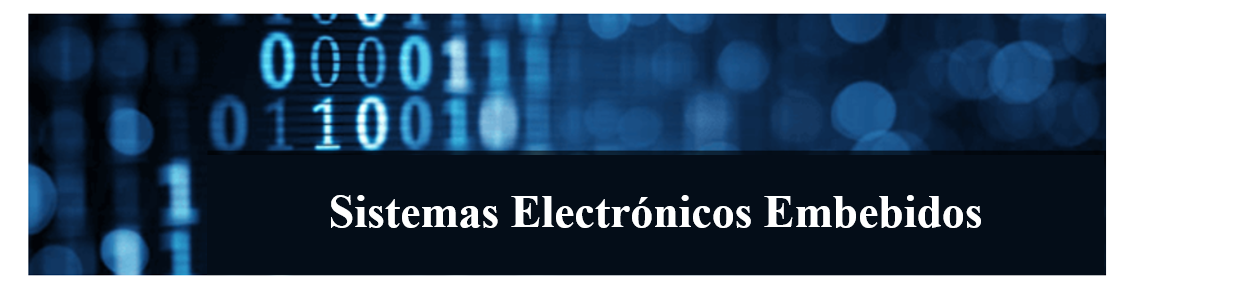

<h1><center><b>Herramientas y librería Opencv</b></center></h1>


## **Objetivos**<a name="id1"></a>
- Familiarizarse con librerías de software de alto nivel.
- Entender algunas funciones de opencv para extraer y manejar caracteristicas básicas de una imagen.
- Implementar un algoritmo de reconocimiento facial a un alto nivel.



# **Visión por Computador**




<p align="justify">
La visión por ordenador es un campo de estudio que abarca cómo la computadora ve y entiende las imágenes y videos digitales.
La visión por computadora implica ver o detectar un estímulo visual, dar sentido a lo que ha visto y también extraer información compleja que podría ser utilizada para otras actividades de aprendizaje automático. Algunos de sus principales usos son: <br><br>
<p align="justify">
Vehículos autónomos: Esta es una de las aplicaciones más importantes de la visión por ordenador donde los coches autónomos necesitan recopilar información sobre su entorno para decidir cómo comportarse. <br><br>
<p align="justify">
Reconocimiento facial: Esta es también una aplicación muy importante de la visión por ordenador donde la electrónica utiliza tecnología de reconocimiento facial para validar básicamente la identidad del usuario.
Búsqueda de imágenes y reconocimiento de objetos — Ahora podríamos buscar objetos en una imagen usando la búsqueda de imágenes. Un muy buen ejemplo es google lens donde podríamos buscar un objeto en particular dentro de la imagen haciendo clic en la foto de la imagen y el algoritmo de visión por ordenador buscará a través del catálogo de imágenes y extraerá información de la imagen. <br><br>
<p align="justify">
Robótica: La mayoría de las máquinas robóticas, a menudo en la fabricación, necesitan ver su entorno para realizar la tarea en cuestión. En la fabricación de máquinas se pueden utilizar para inspeccionar las tolerancias de montaje "mirando" a ellos.

# **Introducción a OpenCV**




image.png

<p align="justify">
OpenCV (Open Source Computer Vision Library) es una biblioteca de software de aprendizaje automático y visión artificial de código abierto. OpenCV fue construido para proporcionar una infraestructura común para aplicaciones de visión computarizada y para acelerar el uso de la percepción de la máquina en los productos comerciales. Al ser un producto con licencia BSD, OpenCV facilita a las empresas el aprovechamiento y la modificación del código. <br> <br>
La biblioteca cuenta con más de 2500 algoritmos optimizados, que incluye un conjunto completo de algoritmos clásicos y de última generación de visión por ordenador y aprendizaje automático. Estos algoritmos se pueden utilizar para detectar y reconocer caras, identificar objetos, clasificar acciones humanas en vídeos, rastrear movimientos de cámara, rastrear objetos en movimiento, extraer modelos 3D de objetos, producir nubes de puntos 3D a partir de cámaras estéreo, unir imágenes para producir una imagen de alta resolución de toda una escena, encontrar imágenes similares de una base de datos de imágenes, eliminar los ojos rojos de las imágenes tomadas usando flash, seguir los movimientos oculares, reconocer paisajes y establecer marcadores de superposición. OpenCV tiene más de 47 mil personas de comunidad de usuarios y un número estimado de descargas superiores a 18 millones. La biblioteca se utiliza ampliamente en empresas, grupos de investigación y por organismos gubernamentales.

# **Code**

### **Librerias**

In [2]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import copy
import imutils
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

Celda enfocada en cargar archivos al ambiente del notebook

In [ ]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

###**Lectura de imagenes**

In [ ]:
img = cv2.imread('/content/pajaro.jpg')
print(img)

[[[ 25 132  89]
  [ 24 131  88]
  [ 23 130  87]
  ...
  [ 30  70  68]
  [ 34  71  75]
  [ 34  70  78]]

 [[ 24 131  88]
  [ 24 131  88]
  [ 23 130  87]
  ...
  [ 33  73  71]
  [ 35  72  76]
  [ 35  71  79]]

 [[ 24 132  89]
  [ 23 131  88]
  [ 23 130  87]
  ...
  [ 34  78  72]
  [ 35  73  77]
  [ 36  72  80]]

 ...

 [[ 54 118  88]
  [ 54 118  88]
  [ 54 118  88]
  ...
  [205 255 255]
  [205 255 255]
  [205 255 255]]

 [[ 53 117  87]
  [ 53 117  87]
  [ 53 117  87]
  ...
  [205 255 255]
  [205 255 255]
  [205 255 255]]

 [[ 52 116  86]
  [ 52 116  86]
  [ 52 116  86]
  ...
  [205 255 255]
  [205 255 255]
  [205 255 255]]]


In [ ]:
cv2_imshow(img)

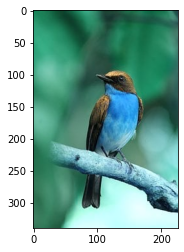

In [ ]:
plt.imshow(img)

### **Canales de una Imagen**

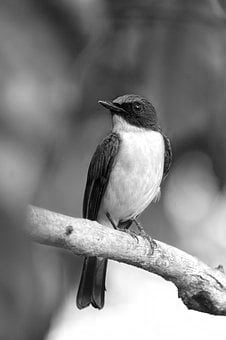

In [ ]:
 b,g,r = cv2.split(img)
 cv2_imshow(r)

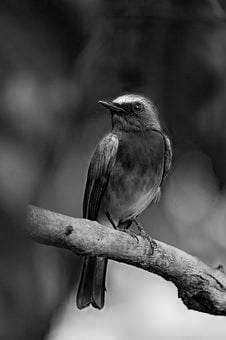

In [ ]:
 b,g,r = cv2.split(img)
 cv2_imshow(b)

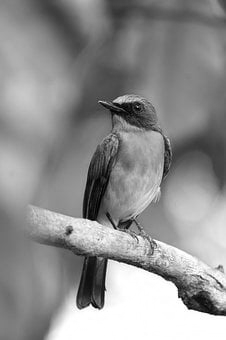

In [ ]:
 b,g,r = cv2.split(img)
 cv2_imshow(g)

### **Espacio de color**

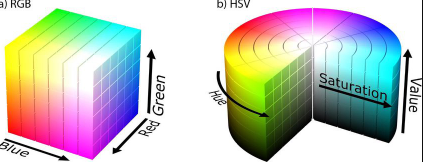

<p align="justify">
Generalmente las imágenes digitales están en RGB (rojo, verde, azul). Por lo tanto, cuando OpenCV lee la imagen RGB, normalmente almacena la imagen en el canal BGR (azul, verde, rojo). Para algunos propósitos del reconocimiento de imágenes, necesitamos convertir este canal BGR a canal gris. La razón de esto es canal gris es fácil de procesar y es computacionalmente menos intensivo, ya que contiene sólo 1 canal.

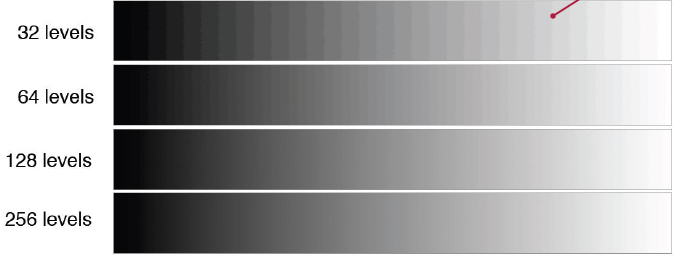

In [ ]:
img = cv2.imread('/content/dog.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
luv = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)


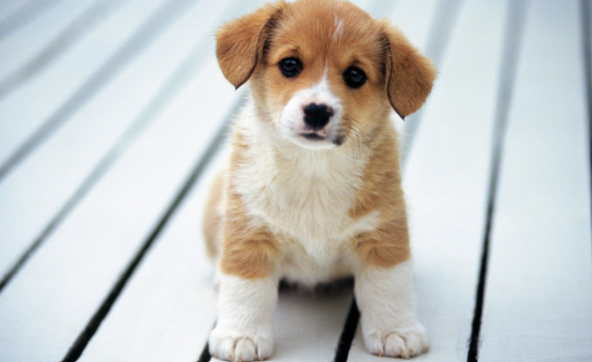

In [ ]:
cv2_imshow(img)

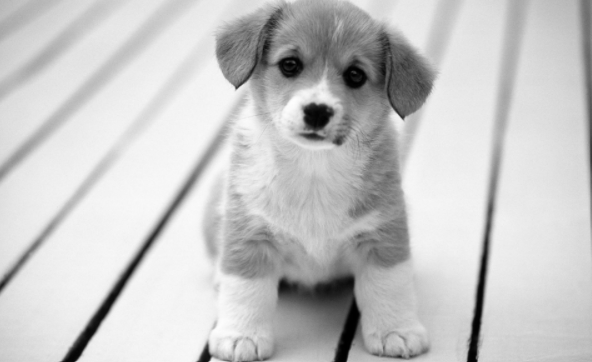

In [ ]:
cv2_imshow(gray)

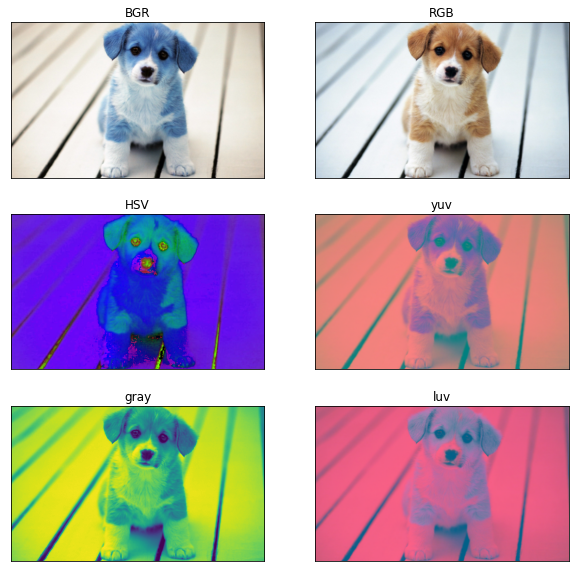

In [ ]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))


plt.subplot(3,2,1),plt.imshow(img)
plt.title('BGR'), plt.xticks([]), plt.yticks([])


plt.subplot(3,2,2),plt.imshow(rgb)
plt.title('RGB'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,3),plt.imshow(hsv)
plt.title('HSV'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,4),plt.imshow(yuv)
plt.title('yuv'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,5),plt.imshow(gray)
plt.title('gray'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,6),plt.imshow(luv)
plt.title('luv'), plt.xticks([]), plt.yticks([])

plt.show()

### **Reducción de dimensiones**

In [ ]:
img = cv2.imread('/content/pajaro.jpg')

print('Dimension original: ', img.shape)

scala = 30
width= int(img.shape[1]*scala /100)
height= int(img.shape[0]*scala /100)
dim = (width, height)

resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Dimensión actual: ', resized.shape)

Dimension original:  (340, 226, 3)
Dimensión actual:  (102, 67, 3)


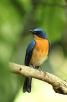

In [ ]:
cv2_imshow(img)
cv2_imshow(resized)

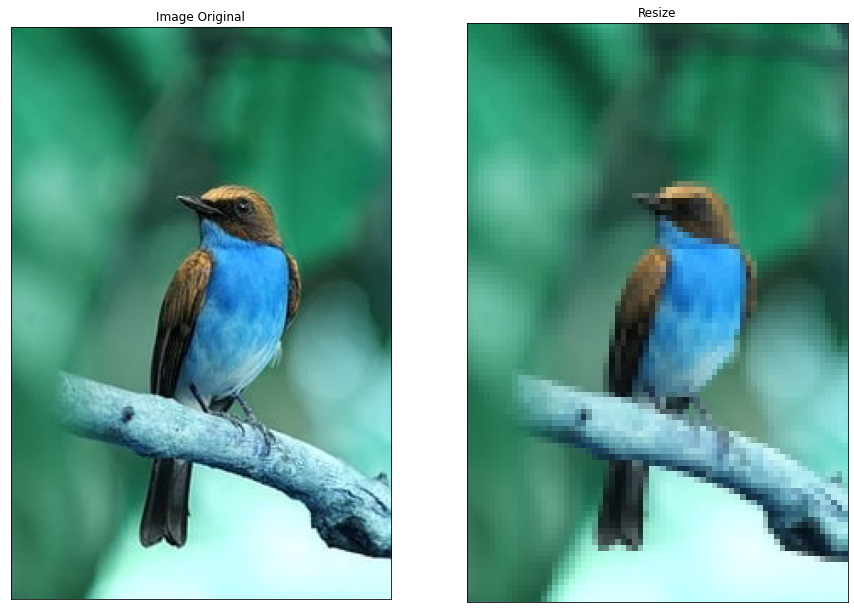

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Image Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(resized)
plt.title('Resize'), plt.xticks([]), plt.yticks([])
plt.show()

## **Filtros de imagen / Operaciones morfológicas**

Este tipo de operaciones buscan realizar la supresión de ruido, simplificar las formas de las imagenes, destacar la estructura de los objetoos o llegar a una descripción de los mismos como su área o su perímetro.

image.png

Los dos tipos de operaciones mas utilizadas es la dilatación y la erosíon, en donde se busca realizar un crecimiento o una reducción de los píxeles situados alrededor de los bordes de los objetos basados en la mascara o nucleo que se esta aplicando. 

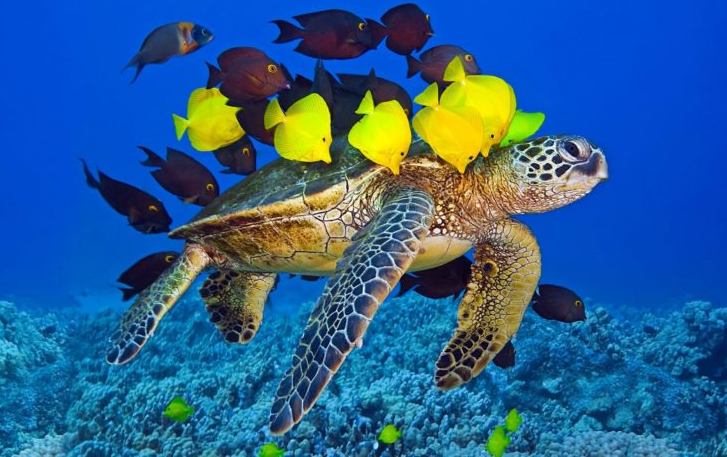

In [ ]:
img = cv2.imread('/content/Turttle.png')
cv2_imshow(img)

In [ ]:
kernel = np.ones((5,5), np.uint8)
img_e = cv2.erode(img, kernel, iterations=1) 
img_d = cv2.dilate(img, kernel, iterations=10)
dst = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)

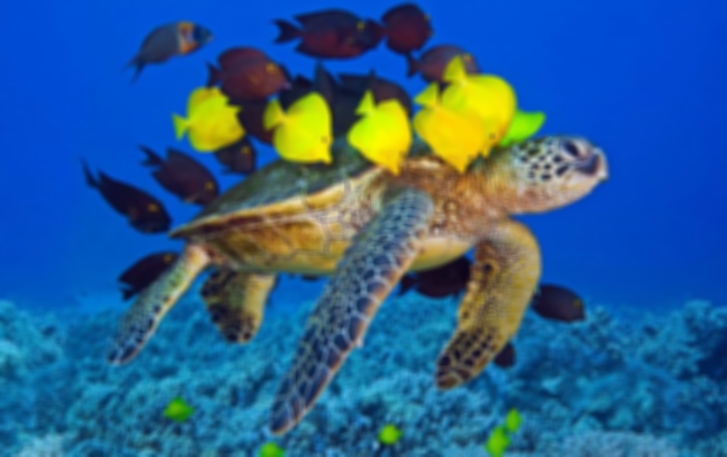

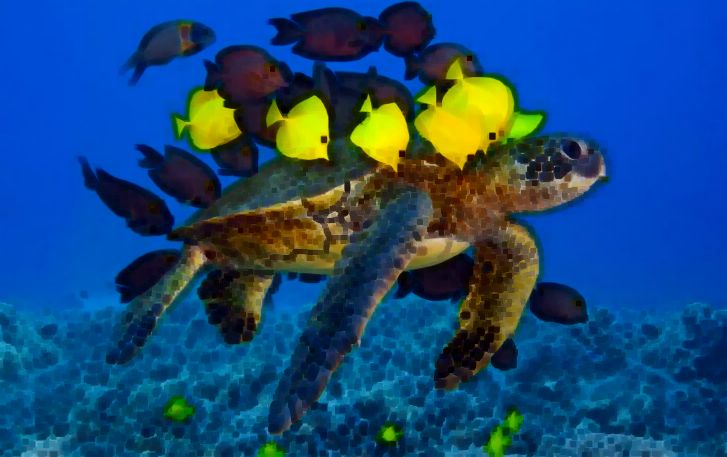

In [ ]:
cv2_imshow(dst) 
cv2_imshow(img_e) 

##**Detección de bordes**

Estos algoritmos buscan resaltar los cambios de intesidad en las diferentes regiones de una imagen, los cuales son comunes de encontrar entre los límites de los objetos.

Existen diferentes operadores que pemriten obtener los bordes de una imagen (Sobel, Prewwit, Laplaciano, ...) pero en este caso nos centraremos en el operador Sobel y el operador Cany.

Sobel busca procesar la imagen en las diferentes direcciones de X y Y. Para esto, prmero se convierte la imagen a escala de grises y luego se realiza una convolución con kernels como los que se muestran a continuación. Esto permite obtener el gradiente de la imagen ya sea en dirección X o Y

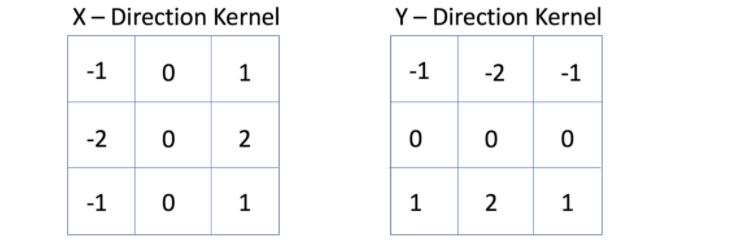

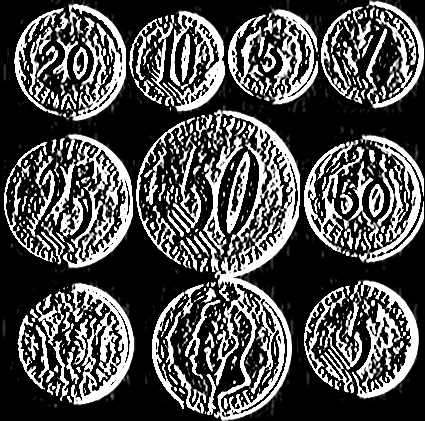

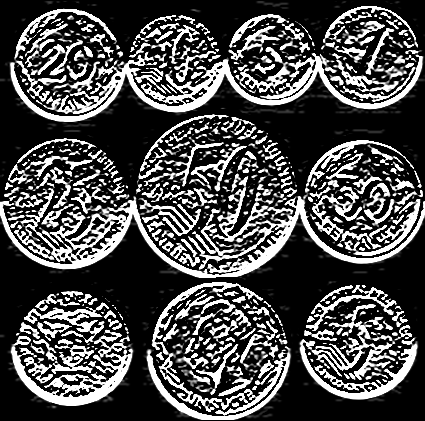

In [5]:
img = cv2.imread('moneda.jpg')
cv2_imshow(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(sobelxy)



Otro algoritmo bastante util es Canny, el cual consta de varias etapas entre las cuales se parte de una detección de bordes con Sobel, seguido a esto se realizan una supresión de los píxeles fuera de los bordes y por ultimo se plantea un umbral basado en histeresis. Básicamente busca mejorar el filtro Sobel eliminando los bordes que no nos interesan y manteniendo únicmanete los boldes de intereces mediante tecnicas de adelgazado.

In [6]:
# Canny
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
cv2_imshow(edges)

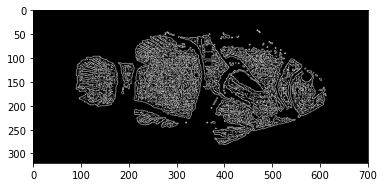

In [ ]:
edged = cv2.Canny(final_result,0,0)
plt.imshow(edged, cmap="gray")

## **Segmentación**

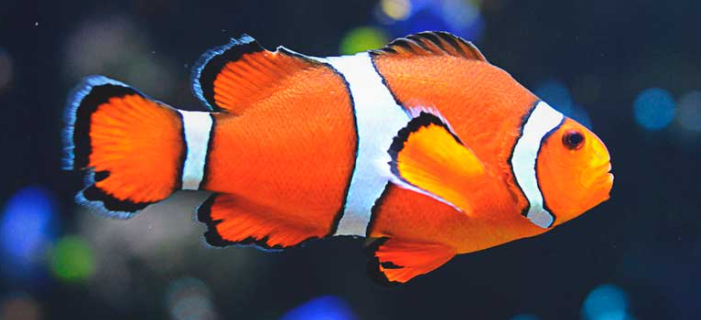

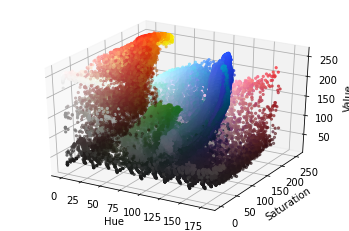

In [ ]:
img = cv2.imread('/content/Fish.png')
cv2_imshow(img) 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
nemo= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, s, v = cv2.split(hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")


pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
Minmask = (1, 190, 200)
Maxmask = (18, 255, 255)

In [ ]:
lo_square = np.full((10, 10, 3), Maxmask, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), Minmask, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [ ]:
mask = cv2.inRange(hsv, Minmask, Maxmask)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

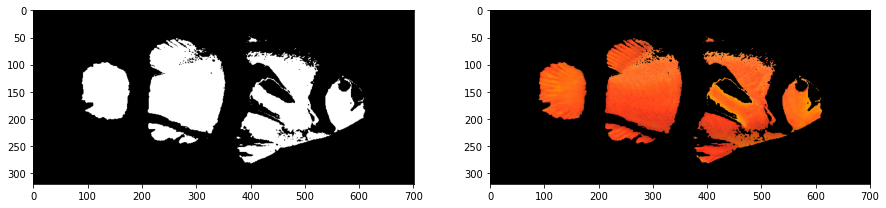

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

En determinado caso de querer segmentar todo nuestro pez payaso. ¿Qué se podría hacer?

In [ ]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

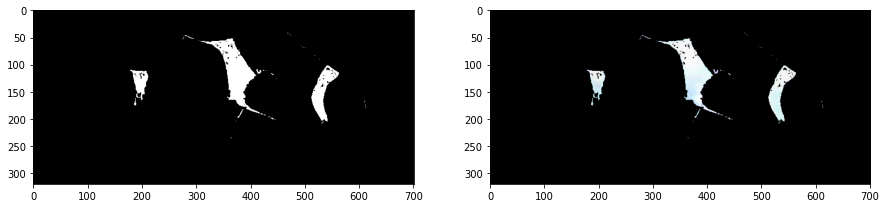

In [ ]:
mask_white = cv2.inRange(hsv, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

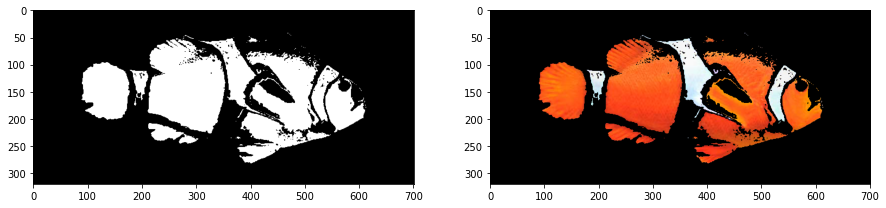

In [ ]:
img = cv2.imread('/content/pez-payaso.jpg')
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

Como se podria mejorar el desempeño de la segmentación realizada?
(dilatación, erosión, blur, espacios de color)

## **Detección**

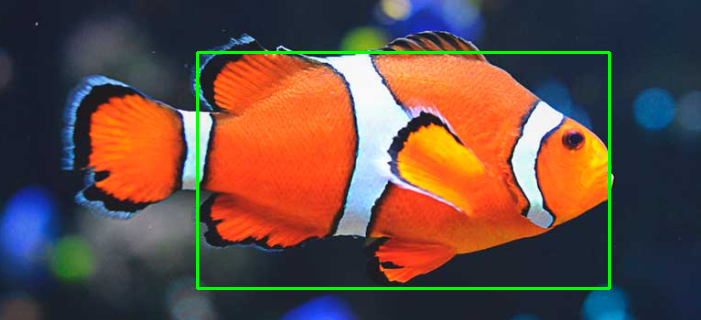

In [ ]:
img = cv2.imread('/content/Fish.png')
img_c = cv2.erode(final_mask, kernel, iterations=5)
img_d = cv2.dilate(img_c, kernel, iterations=13)

(contours,_) = cv2.findContours(img_d, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)

cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
cv2_imshow(img)

In [9]:
image = cv2.imread('/content/bordes.PNG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(image)
cv2_imshow(thresh)

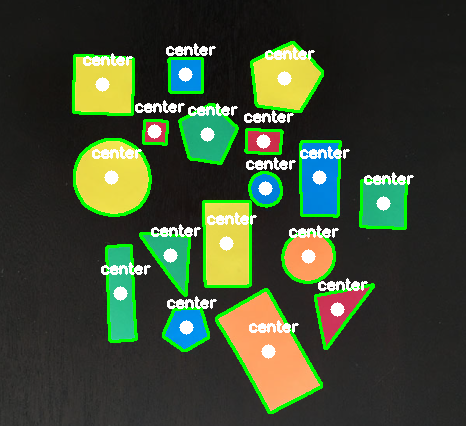

In [10]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
  # Encontrar el centro de cada elemento
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# contornos
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
	cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

cv2_imshow(image)

##**Haar-Cascade**

https://github.com/opencv/opencv/tree/master/data/haarcascades

<p align="justify">
Detección de objetos mediante clasificadores en cascada basados en características Haar es un método eficaz de detección de objetos propuesto por Paul Viola y Michael Jones en su artículo, "Rapid Object Detection using a Boosted Cascade of Simple Features" en 2001. Es un enfoque basado en el aprendizaje automático donde una función en cascada se entrena a partir de una gran cantidad de imágenes positivas y negativas. 

https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

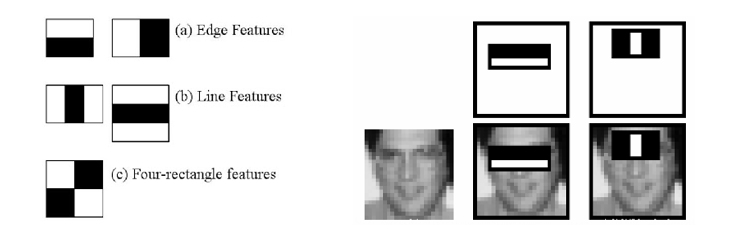



*   **Detect MuliScale:** Permite detectar los objetos de acuerdo al clasificador que se utiliza, sus principales parámetros son:


1.   Image: Imagen de entrada
2.   Scale Factor: Define que tanto se va a reducir la imagen. Ej: 1.1 representa que la imagen se va a reducir en un 10%. Un valor muy alto influira en que se pierdan detecciones, mientras que un valor bajo ocacionara un mayor tiempo de procesamiento, pero un incremento de falsos positivos.

image.png

3. MinNeighbors: Cuantos vecions debe tener un candidato vecino para considarlo un rostro.

4. MinSize / MaxSize: Tamaño minimo o máxmo posible del objeto a clasificar.





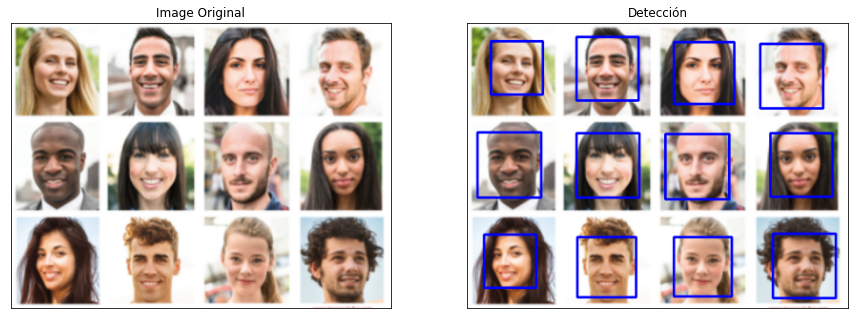

In [13]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img = cv2.imread('/content/rostro.PNG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 4)


for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

dim = (400, 300)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#cv2_imshow(resized)
resized=cv2.cvtColor(resized,cv2.COLOR_BGR2RGB)


imgO = cv2.resize(cv2.imread('/content/rostro.PNG'), dim, interpolation = cv2.INTER_AREA)
#cv2_imshow(resized)
imgO=cv2.cvtColor(imgO,cv2.COLOR_BGR2RGB)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(imgO)
plt.title('Image Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(resized)
plt.title('Detección'), plt.xticks([]), plt.yticks([])
plt.show()